In [209]:
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from sympy import *
import TridiagonalMatrixHandler as tmh
from numba import njit
import math
import numpy as np
import importlib
importlib.reload(tmh)

<module 'TridiagonalMatrixHandler' from '/Users/o.peretyatko/Study/university/Diplom/TridiagonalMatrixHandler.py'>

In [210]:
%matplotlib notebook

# $$\frac{\partial u}{\partial t}=D\frac{\partial^2 u}{\partial x^2} + Au(1-\frac{u}{C}) - σu;\qquad x∈(0,L); \qquad t∈(0,T) $$
# $$u(x,0)=e^{-x^2}; \qquad x∈(0,L);$$
# $$\frac{\partial u}{\partial x}|_{x=0,L} = 0;$$

$$F(u)=Au^k_j\cdot(1-\frac{u^{k}_j}{C})- \sigma u^{k}_j$$
$$где\qquad C - некоторая\qquad константа$$

In [211]:
C=10

@njit
def carryingCapacityFunction(ukj, k=0, u2=0): return ukj/C

u = tmh.createAndSolveUByYavnayMethods(carryingCapacityFunction)
print("\nC = " + str(C))
print(u.max())


C = 10
4.999999999999995


	Коэффициент миграции (D) = 0.01	Рождения новых людей (a) = 1.5
			Смертность населения (σ) = 0.75

	Количество точек по ОХ (N) = 1000	Количество точек по T (KT) = 10000
	Конец отрезка по OX (L) = 100	Конечный момент (T) = 1000

		число Куранта = 0.09980009999999999	Система устойчивая


<IPython.core.display.Javascript object>


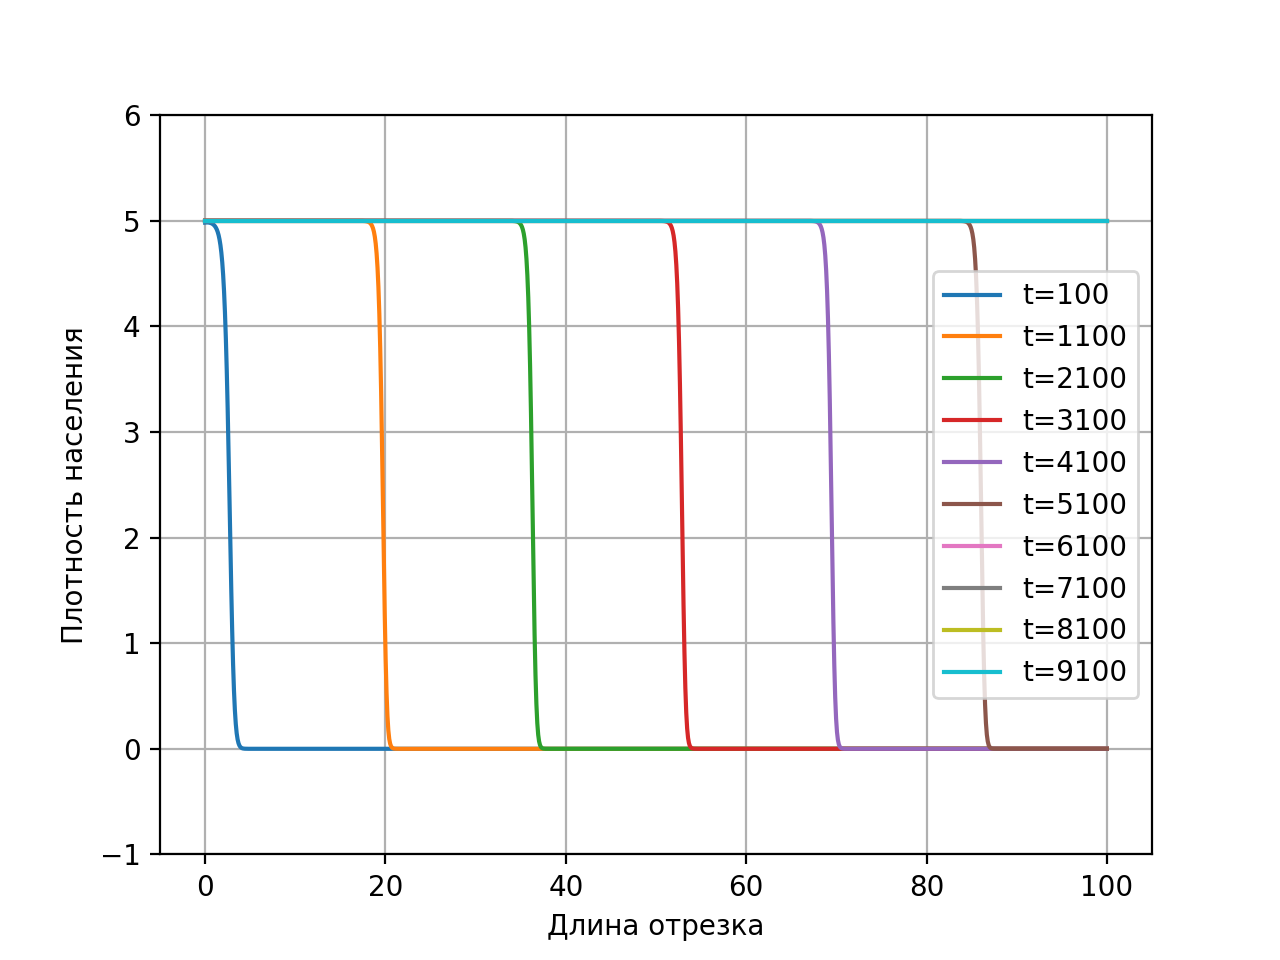

In [216]:
x=tmh.x
tmh.showAllConstant()

t = np.linspace(tmh.t0, tmh.KT, tmh.T)

# fig = plt.figure(facecolor='white')
# ax = plt.axes(xlim=(-5, tmh.L+5), ylim=(-1, u.max()+1) )
# line, = ax.plot([ ], [ ], lw=3)
# def redraw(i):
#     line.set_data(x, u[:,i])
#     string = 'Время:'+str(i)
#     plt.suptitle(string)
# anim = animation.FuncAnimation(fig,redraw,frames=tmh.KT,interval=1)

ax = plt.axes(xlim=(-5, tmh.L+5), ylim=(-1, u.max()+1) )
for i in range(100, tmh.KT, 1000):
    #plt.plot(t, u[:,i], label='t='+str(i))
    plt.plot(x, u[:,i], label='t='+str(i))
plt.legend(loc='best')

ax.set_xlabel('Длина отрезка')
ax.set_ylabel('Плотность населения')

plt.grid(True)
plt.show()

In [127]:
tmh.countSpeed(u, 20)

0.25995995995995996

In [81]:
speed = 2 * math.sqrt(tmh.D * (tmh.birthKoeff - tmh.deathKoeff))
speed

0.17320508075688773